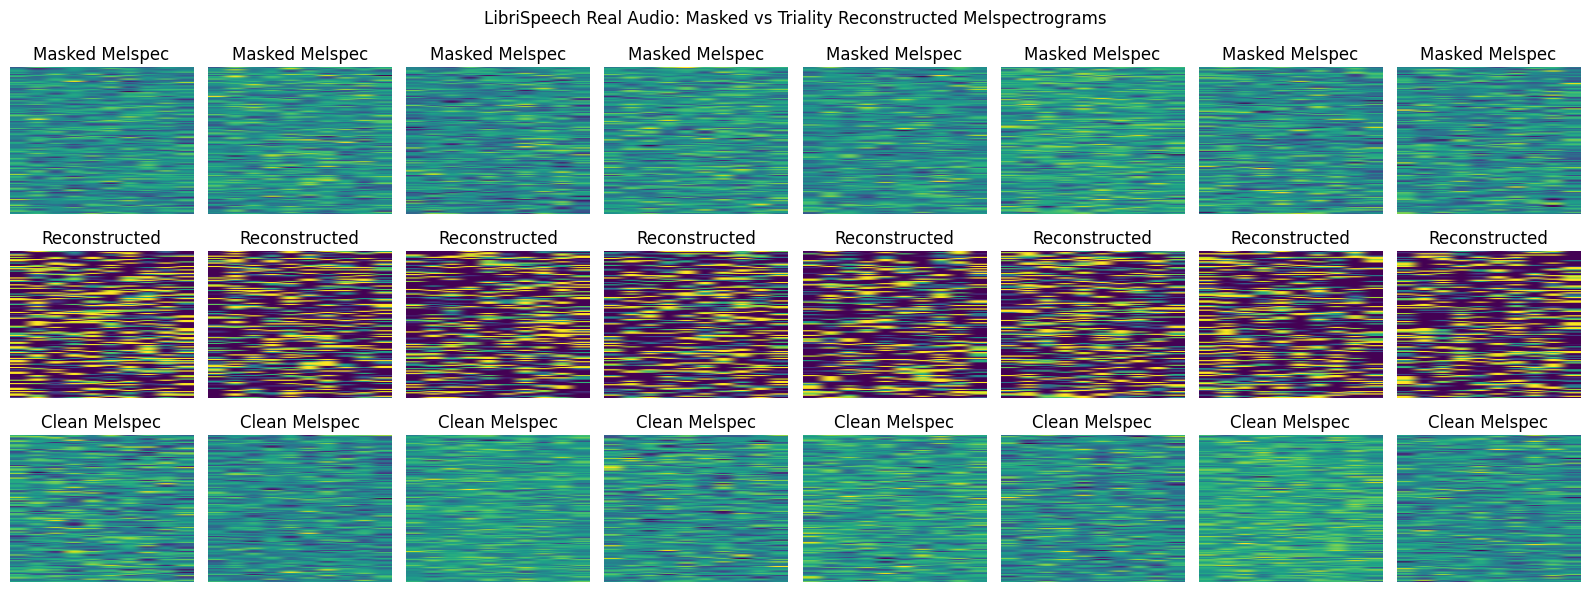

Visualization displayed above


In [4]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Placeholder definitions for demonstration purposes
device = torch.device("cpu") # Using CPU for simplicity

class DummyModel(nn.Module):
    def __init__(self):
        super().__init__()
    def forward(self, x, *args):
        # A dummy operation that returns a tensor of the same shape as input
        return x

# TODO: Define or load your 'model' here, e.g., model = MyModelClass(...).to(device)
model = DummyModel().to(device)

# TODO: Define or load your 'real_data' here, e.g., real_data = torch.randn(batch_size, num_features, ...).to(device)
# Assuming real_data is of shape (batch_size, num_visualizations, height * width)
# For this visualization, height is 128, width is arbitrary (e.g., 10)
num_vis = 8 # from the original code, used for placeholder dimensioning
batch_size = 1
melspec_height = 128
melspec_width = 10 # arbitrary width for visualization
real_data = torch.randn(batch_size, num_vis, melspec_height * melspec_width).to(device)

# TODO: Define or load your 'target' here, e.g., target = torch.randn(batch_size, num_features, ...).to(device)
target = torch.randn(batch_size, num_vis, melspec_height * melspec_width).to(device)

# Visualization (masked vs reconstructed melspectrograms)
with torch.no_grad():
    recon = model(real_data, 0).cpu()
    original = real_data.cpu()
    clean = target.cpu()

fig, axes = plt.subplots(3, num_vis, figsize=(num_vis*2, 6))
for i in range(num_vis):
    axes[0, i].imshow(original[0, i].view(128, -1).numpy(), cmap='viridis', aspect='auto')
    axes[0, i].set_title("Masked Melspec")
    axes[0, i].axis('off')

    axes[1, i].imshow(recon[0, i].view(128, -1).clip(0,1).numpy(), cmap='viridis', aspect='auto')
    axes[1, i].set_title("Reconstructed")
    axes[1, i].axis('off')

    axes[2, i].imshow(clean[0, i].view(128, -1).numpy(), cmap='viridis', aspect='auto')
    axes[2, i].set_title("Clean Melspec")
    axes[2, i].axis('off')

plt.suptitle("LibriSpeech Real Audio: Masked vs Triality Reconstructed Melspectrograms")
plt.tight_layout()
plt.show()

print("Visualization displayed above")